In [1]:
# Final Project for COGS 108

In [2]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [4]:
data_2018 = pd.read_csv('2018.csv')
data_2017 = pd.read_csv('2017.csv')
data_2016 = pd.read_csv('2016.csv')
data_2015 = pd.read_csv('2015.csv')

In [5]:
data_2018

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2018",Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,"December 29, 2018",Ohio,Lima,904 S Main St,1,3,NaN
2,"December 28, 2018",Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
3,"December 24, 2018",Louisiana,Lutcher,2176 Main St,2,2,NaN
4,"December 23, 2018",Missouri,Springfield,1042 W College St,1,6,NaN
...,...,...,...,...,...,...,...
332,"January 7, 2018",Alabama,Union Springs,US-29,1,5,NaN
333,"January 7, 2018",Florida,Plantation,5225 W Broward Blvd,0,4,NaN
334,"January 5, 2018",Mississippi,Hattiesburg,6168 US 49,0,6,NaN
335,"January 4, 2018",Arkansas,Brinkley,615 W 6th St,1,3,NaN


In [6]:
data_2017

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2017",Colorado,Littleton (Highlands Ranch),3404 E County Line Rd,2,6,NaN
1,"December 31, 2017",Illinois,Chicago,2335 Howard St,0,4,NaN
2,"December 31, 2017",New Jersey,Long Branch,635 Wall St,4,0,NaN
3,"December 27, 2017",Nevada,Las Vegas,3750 E Bonanza Rd,2,2,NaN
4,"December 26, 2017",Florida,Miami,NW 18th Ave and 86th Ter,0,5,NaN
...,...,...,...,...,...,...,...
341,"January 4, 2017",California,Fontana,14520 Village Drive,3,1,NaN
342,"January 3, 2017",Texas,Allen,500 block of Hawthorne Drive,0,4,NaN
343,"January 1, 2017",Mississippi,Winstonville,114 North Greyer Street,0,5,NaN
344,"January 1, 2017",Texas,Dallas,9220 Skillman Street,1,3,NaN


In [7]:
data_2016

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2016",Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
1,"December 31, 2016",Texas,Houston,3704 Fannin Street,1,3,NaN
2,"December 30, 2016",Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
3,"December 30, 2016",Connecticut,Wallingford,95 S Turnpike Rd,2,3,NaN
4,"December 28, 2016",Georgia,Columbus,2914 10th Street,1,4,NaN
...,...,...,...,...,...,...,...
377,"January 11, 2016",Delaware,Wilmington,900 block of Brown Street,1,4,NaN
378,"January 8, 2016",District of Columbia,Washington,1700 E Capitol St NE,0,4,NaN
379,"January 8, 2016",Illinois,Chicago,1500 block of South Kedzie,1,4,NaN
380,"January 7, 2016",Tennessee,Memphis,3800 block of Kerwood Avenue,1,3,NaN


In [8]:
data_2015

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,476321,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,473882,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,472268,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,471867,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,471860,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN
...,...,...,...,...,...,...,...,...
330,274867,"January 6, 2015",Florida,Miami,1300 block of NW 62nd Street,1,3,NaN
331,273535,"January 4, 2015",Virginia,Roanoke,3634 Shenandoah Ave NW,2,4,NaN
332,273397,"January 4, 2015",Texas,Dallas,2000 block of Ben Hur St.,3,1,NaN
333,273965,"January 2, 2015",Georgia,Savannah,500 block of W. 54th Street,1,4,NaN


In [9]:
# transform everything into dataframe
#drop the incident ID column from year 2015
df2015 = pd.DataFrame(data_2015)
df2016 = pd.DataFrame(data_2016)
df2017 = pd.DataFrame(data_2017)
df2018 = pd.DataFrame(data_2018)

In [10]:
df2015 = df2015.drop(columns=['Incident ID'])

In [11]:
#combine the data from the four years together and name it newdf
newdf = pd.concat([df2015, df2016, df2017, df2018], join="inner", ignore_index = True)

In [12]:
newdf

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN
...,...,...,...,...,...,...,...
1395,"January 7, 2018",Alabama,Union Springs,US-29,1,5,NaN
1396,"January 7, 2018",Florida,Plantation,5225 W Broward Blvd,0,4,NaN
1397,"January 5, 2018",Mississippi,Hattiesburg,6168 US 49,0,6,NaN
1398,"January 4, 2018",Arkansas,Brinkley,615 W 6th St,1,3,NaN


In [13]:
newdf['# Injured'].max()

441

In [14]:
newdf['# Killed'].max()

59

In [15]:
newdf['State'].value_counts()

California              145
Illinois                138
Florida                 109
Texas                    88
New York                 62
Pennsylvania             59
Ohio                     57
Tennessee                55
Louisiana                55
Georgia                  54
Missouri                 47
New Jersey               41
Maryland                 41
Alabama                  40
North Carolina           38
Michigan                 38
Virginia                 32
Indiana                  31
South Carolina           27
Mississippi              24
District of Columbia     18
Colorado                 17
Arizona                  17
Minnesota                17
Kentucky                 16
Washington               15
Arkansas                 14
Kansas                   12
Connecticut              12
Oklahoma                 12
Wisconsin                11
Nevada                   10
Massachusetts            10
New Mexico               10
Nebraska                  6
Delaware            

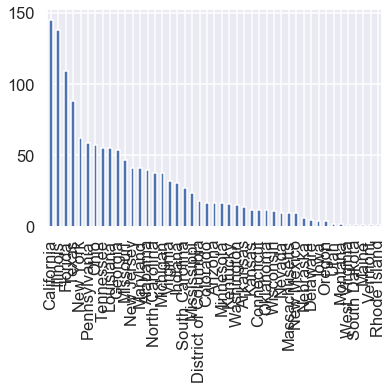

In [16]:
newdf['State'].value_counts().plot(kind='bar')

In [17]:
newdf['# Injured'].value_counts()

4      555
3      263
5      192
2      105
6       78
1       63
0       57
7       37
8       13
9       10
10       6
11       3
14       3
19       3
12       2
13       2
17       2
53       1
15       1
18       1
20       1
25       1
441      1
Name: # Injured, dtype: int64

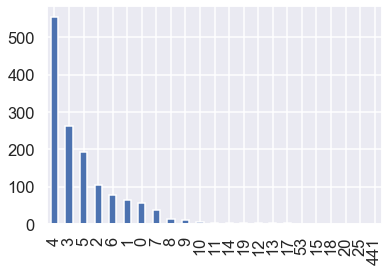

In [18]:
newdf['# Injured'].value_counts().plot(kind='bar')

In [26]:
newdf.loc[newdf['# Injured'] == 0 ]

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
36,"November 15, 2015",Texas,Tennessee Colony,800 block of An County Rd 2217,5,0,NaN
46,"November 2, 2015",South Carolina,Pendleton,2217 Refuge Road,4,0,NaN
83,"September 17, 2015",South Dakota,Geddes,36705 379th Street,6,0,NaN
92,"September 10, 2015",Minnesota,Excelsior (Greenwood),Channel Drive,5,0,NaN
129,"August 8, 2015",Texas,Houston,2211 Falling Oaks,8,0,NaN
...,...,...,...,...,...,...,...
1246,"June 28, 2018",Maryland,Annapolis,888 Bestgate Rd,5,0,NaN
1365,"February 26, 2018",Michigan,Detroit,22700 Fenkell Ave,5,0,NaN
1374,"February 10, 2018",Kentucky,Paintsville,413 Mill St,5,0,NaN
1379,"January 28, 2018",Pennsylvania,Melcroft,1301 Indian Creek Valley Rd,5,0,NaN


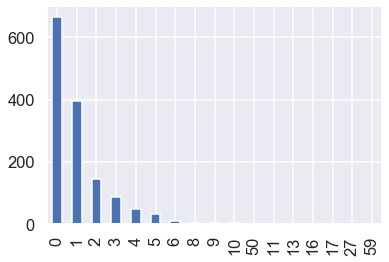

In [20]:
newdf['# Killed'].value_counts().plot(kind='bar')